<a href="https://colab.research.google.com/github/PruthviPatelML/Object-Detection--crop-disease-detection/blob/main/1_exp_rcnn_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd

/root


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
array = [[166,8,25,9,0,0,0,0,0,0,161], 
        [4,196,0,0,4,3,0,0,0,0,54], 
        [0,0,591,0,0,0,0,0,0,0,17], 
        [0,0,0,139,0,0,0,0,0,0,0], 
        [0,0,0,2,131,15,10,0,5,0,175], 
        [0,2,0,4,19,150,2,0,0,0,34], 
        [0,0,0,1,11,3,300,0,0,1,133],
        [0,0,0,0,1,0,0,96,0,1,57], 
        [0,0,34,0,1,0,0,0,163,0,15], 
        [0,0,0,0,0,0,2,0,0,303,184],
        [252,44,217,96,57,31,116,25,32,148,0]]


In [ ]:
df_cm = pd.DataFrame(array, index = [i for i in "1234567891"],
                  columns = [i for i in "tbs1 tbs2 thf thl tlb1 tlb2 tlmn tpn tsw twf no"])
plt.figure(figsize = (11,11))
sn.heatmap(df_cm, annot=True)

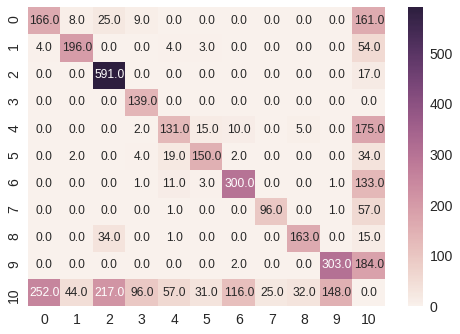

In [ ]:
df_cm = pd.DataFrame(array, range(11), range(11))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},fmt=".1f")# font size

In [ ]:
rm -r /root/models

rm: cannot remove '/root/models': No such file or directory


In [ ]:
!git clone --quiet https://github.com/tensorflow/models.git

!apt-get install -qq protobuf-compiler python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

!pip install -q pycocotools

%cd ~/models/research
!protoc object_detection/protos/*.proto --python_out=.

/root/models/research


In [ ]:
!python setup.py build
!python setup.py install

running build
running build_py
creating build
creating build/lib.linux-x86_64-2.7
creating build/lib.linux-x86_64-2.7/object_detection
copying object_detection/export_tflite_ssd_graph.py -> build/lib.linux-x86_64-2.7/object_detection
copying object_detection/model_tpu_main.py -> build/lib.linux-x86_64-2.7/object_detection
copying object_detection/model_hparams.py -> build/lib.linux-x86_64-2.7/object_detection
copying object_detection/exporter_test.py -> build/lib.linux-x86_64-2.7/object_detection
copying object_detection/export_inference_graph.py -> build/lib.linux-x86_64-2.7/object_detection
copying object_detection/inputs.py -> build/lib.linux-x86_64-2.7/object_detection
copying object_detection/exporter.py -> build/lib.linux-x86_64-2.7/object_detection
copying object_detection/eval_util.py -> build/lib.linux-x86_64-2.7/object_detection
copying object_detection/export_tflite_ssd_graph_lib_test.py -> build/lib.linux-x86_64-2.7/object_detection
copying object_detection/eval_util_test.p

In [ ]:
%cd slim
!pip install -e .

/root/models/research/slim
Obtaining file:///root/models/research/slim
  Running setup.py develop for slim


In [ ]:
%cd ..
!python object_detection/builders/model_builder_test.py

/root/models/research

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

............s...
----------------------------------------------------------------------
Ran 16 tests in 0.085s

OK (skipped=1)


In [ ]:
rm -r ~/datalab

In [ ]:
%cd ~
!mkdir datalab

/root


In [ ]:
%cd ~/datalab
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1bnpwQm7n_pabtrLIi9S70A7yFDArw76D'

downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('/root/datalab/final.zip')

/root/datalab


In [ ]:
!unzip '/root/datalab/final.zip'

Archive:  /root/datalab/final.zip
   creating: annotations/
   creating: annotations/xmls/
  inflating: annotations/xmls/tbs1_001.xml  
  inflating: annotations/xmls/tbs1_002.xml  
  inflating: annotations/xmls/tbs1_005.xml  
  inflating: annotations/xmls/tbs1_006.xml  
  inflating: annotations/xmls/tbs1_008.xml  
  inflating: annotations/xmls/tbs1_009.xml  
  inflating: annotations/xmls/tbs1_016.xml  
  inflating: annotations/xmls/tbs1_018.xml  
  inflating: annotations/xmls/tbs1_019.xml  
  inflating: annotations/xmls/tbs1_021.xml  
  inflating: annotations/xmls/tbs1_024.xml  
  inflating: annotations/xmls/tbs1_025.xml  
  inflating: annotations/xmls/tbs1_026.xml  
  inflating: annotations/xmls/tbs1_028.xml  
  inflating: annotations/xmls/tbs1_031.xml  
  inflating: annotations/xmls/tbs1_045.xml  
  inflating: annotations/xmls/tbs1_047.xml  
  inflating: annotations/xmls/tbs1_049.xml  
  inflating: annotations/xmls/tbs1_054.xml  
  inflating: annotations/xmls/tbs1_056.xml  
  inflati

In [ ]:
!echo "item { id: 1 name: 'tlb1'}" > label_map.pbtxt


fileId = '1bnpwQm7n_pabtrLIi9S70A7yFDArw76D'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

image_files=os.listdir('images')
im_files=[x.split('.')[0] for x in image_files]
with open('annotations/trainval.txt', 'w') as text_file:
  for row in im_files:
    text_file.write(row + '\n')

Extracted zip file 1bnpwQm7n_pabtrLIi9S70A7yFDArw76D.zip


In [ ]:
rm -r /root/datalab/label_map.pbtxt

In [ ]:
%cd /root/datalab/

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

/root/datalab


Saving label_map.pbtxt to label_map.pbtxt
User uploaded file "label_map.pbtxt" with length 324 bytes


In [ ]:
%cd ~/datalab/annotations

!mkdir trimaps

from PIL import Image
image = Image.new('RGB', (640, 480))

for filename in os.listdir('xmls'):
  filename = os.path.splitext(filename)[0]
  image.save('trimaps/' + filename + '.png')

/root/datalab/annotations


In [ ]:
!apt-get -y install protobuf-compiler python-pil python-lxml

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-pil is already the newest version (5.1.0-1).
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-lxml is already the newest version (4.2.1-1ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [ ]:
rm -r /root/models/research/object_detection/dataset_tools/create_pet_tf_record.py

In [ ]:
%cd /root/models/research/object_detection/dataset_tools/

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

/root/models/research/object_detection/dataset_tools


Saving create_pet_tf_record.py to create_pet_tf_record.py
User uploaded file "create_pet_tf_record.py" with length 12108 bytes


In [ ]:
%cd ~/datalab

!python ~/models/research/object_detection/dataset_tools/create_pet_tf_record.py --label_map_path=label_map.pbtxt --data_dir=. --output_dir=. --num_shards=1

/root/datalab
/usr/local/lib/python2.7/dist-packages/object_detection-0.1-py2.7.egg/object_detection/utils/dataset_util.py:75: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if not xml:


In [ ]:
!mv pet_faces_train.record-00000-of-00001 tf_train.record

!mv pet_faces_val.record-00000-of-00001 tf_val.record

In [ ]:
%cd ~/datalab

import os
import shutil
import glob
import urllib
import tarfile

MODEL = 'faster_rcnn_resnet101_coco_2018_01_28'
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = 'pretrained_model'

if not (os.path.exists(MODEL_FILE)):
  opener = urllib.URLopener()
  opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
  shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/root/datalab


In [ ]:
%cd ~/datalab

import re

#filename = '/content/datalab/pretrained_model/pipeline.config'
filename = '/root/models/research/object_detection/samples/configs/faster_rcnn_resnet101_pets.config'
with open(filename) as f:
  s = f.read()
with open(filename, 'w') as f:
  s = re.sub('num_classes: 37', 'num_classes: 10', s)
  s = re.sub('num_examples: 1101', 'num_examples: 10', s)
  s = re.sub('num_steps: 200000', 'num_steps: 3000', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/model.ckpt', '/root/datalab/pretrained_model/model.ckpt', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/model.ckpt', '/root/datalab/pretrained_model/model.ckpt', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/pet_faces_train.record-\?\?\?\?\?-of-00010', '/root/datalab/tf_train.record', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/pet_faces_val.record-\?\?\?\?\?-of-00010', '/root/datalab/tf_val.record', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/pet_label_map.pbtxt', '/root/datalab/label_map.pbtxt', s)
  f.write(s)

/root/datalab


In [ ]:
!cat /root/models/research/object_detection/samples/configs/faster_rcnn_resnet101_pets.config

# Faster R-CNN with Resnet-101 (v1) configured for the Oxford-IIIT Pet Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  faster_rcnn {
    num_classes: 10
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 600
        max_dimension: 1024
      }
    }
    feature_extractor {
      type: 'faster_rcnn_resnet101'
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        scales: [0.25, 0.5, 1.0, 2.0]
        aspect_ratios: [0.5, 1.0, 2.0]
        height_stride: 16
        width_stride: 16
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        

In [ ]:
!rm -r /root/models/research/object_detection/model_lib.py


In [ ]:
%cd /root/models/research/object_detection/

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

/root/models/research/object_detection


Saving model_lib.py to model_lib.py
User uploaded file "model_lib.py" with length 34842 bytes


In [ ]:
%cd ~/datalab

!python ~/models/research/object_detection/model_main.py \
    --pipeline_config_path=/root/models/research/object_detection/samples/configs/faster_rcnn_resnet101_pets.config \
    --model_dir=/root/datalab/trained \
    --alsologtostderr \
    --num_train_steps=3000 \
    --num_eval_steps=500

/root/datalab
/usr/local/lib/python2.7/dist-packages/object_detection-0.1-py2.7.egg/object_detection/utils/visualization_utils.py:26: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/root/models/research/object_detection/model_main.py", line 26, in <module>
    from object_detection import model_lib
  File "/usr/local/lib/python2.7/dist-packages/object_detection-0.1-py2.7.egg/object_detection/model_lib.py", line 27, in <module>
    from object_detection import eval_util
  File "/usr/local/lib/python2.7/dist-packages/object_detection-0.1-py2.7.egg/object_detection/eval_util.py", line 28, in <module>
    from object_detection.metrics import coco_evaluation
  File "/usr/local/lib/python2.7/dist-packages/obj

In [ ]:
!python /root/models/research/object_detection/legacy/train.py \
  --logtostderr \
  --pipeline_config_path=/root/models/research/object_detection/samples/configs/faster_rcnn_resnet101_pets.config \
  --train_dir=/root/datalab/trained 2>&1 /root/datalab/log/tb.log

In [ ]:
!python /root/models/research/object_detection/legacy/eval.py \
    --logtostderr \
    --pipeline_config_path=/root/models/research/object_detection/samples/configs/faster_rcnn_resnet101_pets.config \
    --checkpoint_dir=/root/datalab/trained/ \
    --eval_dir=/root/datalab/eval/


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use object_detection/model_main.py.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:Scale of 0 disables regularizer.
Instructions for updating:

In [ ]:
!ls trained

checkpoint
eval_0
events.out.tfevents.1551947857.7000dcdd50b5
export
graph.pbtxt
model.ckpt-1164.data-00000-of-00001
model.ckpt-1164.index
model.ckpt-1164.meta
model.ckpt-1509.data-00000-of-00001
model.ckpt-1509.index
model.ckpt-1509.meta
model.ckpt-1845.data-00000-of-00001
model.ckpt-1845.index
model.ckpt-1845.meta
model.ckpt-2714.data-00000-of-00001
model.ckpt-2714.index
model.ckpt-2714.meta
model.ckpt-3000.data-00000-of-00001
model.ckpt-3000.index
model.ckpt-3000.meta


In [ ]:
%cd ~/datalab

lst = os.listdir('trained')
lf = filter(lambda k: 'model.ckpt-' in k, lst)
last_model = sorted(lf)[-1].replace('.meta', '')

!python ~/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/root/models/research/object_detection/samples/configs/faster_rcnn_resnet101_pets.config \
    --output_directory=fine_tuned_model \
    --trained_checkpoint_prefix=trained/$last_model

/root/datalab
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
331 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-mi

In [ ]:
!ls fine_tuned_model

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


In [ ]:
%cd ~/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

# if tf.__version__ < '1.4.0':
#   raise ImportError('Please upgrade your tensorflow installation to v1.4.* or later!')
# This is needed to display the images.
%matplotlib inline
from utils import label_map_util
from utils import visualization_utils as vis_util

# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/root/datalab/fine_tuned_model' + '/frozen_inference_graph.pb'
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/root/datalab', 'label_map.pbtxt')
NUM_CLASSES = 10

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/root/datalab/test'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 36) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

In [ ]:
!python /root/models/research/object_detection/inference/infer_detections.py --input_tfrecord_paths=/root/datalab/tf_train.record --output_tfrecord_path=train_detections.tfrecord-00000-of-00001 --inference_graph=/root/datalab/fine_tuned_model/frozen_inference_graph.pb --discard_image_pixels

2019-03-07 09:49:31.311649: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-03-07 09:49:31.311891: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55ef4340a7e0 executing computations on platform Host. Devices:
2019-03-07 09:49:31.311931: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-03-07 09:49:31.392299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-03-07 09:49:31.392941: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55ef434098c0 executing computations on platform CUDA. Devices:
2019-03-07 09:49:31.392980: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capability 3.7
2019-03-07 09:49:31.393459: I tensorflow/core/common_runtime/gpu/gpu_device.cc:143

In [ ]:
!rm -r /root/datalab/confusion_matrix.py

In [ ]:
%cd ~/datalab

from google.colab import files
from os import path

uploaded = files.upload()
  
for name, data in uploaded.items():
  with open('image1.jpg', 'wb') as f:
    f.write(data)
    f.close()
    print('saved file ' + name)

/root/datalab


Saving confusion_matrix.py to confusion_matrix.py
saved file confusion_matrix.py


In [ ]:
SPLIT=validation  # or test
TF_RECORD_FILES=$(ls -1 ${SPLIT}_tfrecords/* | tr '\n' ',')

PYTHONPATH=$PYTHONPATH:$(readlink -f ..) \
python -m object_detection/inference/infer_detections \
  --input_tfrecord_paths=$TF_RECORD_FILES \
  --output_tfrecord_path=${SPLIT}_detections.tfrecord-00000-of-00001 \
  --inference_graph=faster_rcnn_inception_resnet_v2_atrous_oid/frozen_inference_graph.pb \
  --discard_image_pixels

In [ ]:
!python confusion_matrix.py --detections_record=/root/datalab/train_detections.tfrecord-00000-of-00001 --label_map=label_map.pbtxt

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 900 images
Processed 1000 images
Processed 1100 images
Processed 1200 images
Processed 1300 images
Processed 1400 images
Processed 1500 images
Processed 1600 images
Processed 1700 images
Processed 1757 images

Confusion Matrix:
tbs1  tbs2  thf  thl  tlb1 tlb2 tlmn  tpn  tsw twf not-detected
[[166.   8.   0.  25.   9.   0.   0.   0.   0.   0. 161.]
 [  4. 196.   0.   0.   4.   3.   0.   0.   0.   0.  54.]
 [  0.   0. 591.   0.   0.   0.   0.   0.   0.   0.  17.]
 [  0.   0.   0. 139.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   2. 131.  15.  10.   0.   5.   0. 175.]
 [  0.   2.   0.   4.  19. 150.   2.   0.   0.   0.  34.]
 [  0.   0.   0.   1.  11.   3. 300.   0.   0.   1. 133.]
 [  0.   0.   0.   0.   1.   0.   0.  9